In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [28]:
#chargement des données
df =pd.read_csv('USArrests.csv')
#affichage des 5 premieres lignes 
print(df.head())



   Murder  Assault  UrbanPop  Rape       State
0    13.2      236        58  21.2     Alabama
1    10.0      263        48  44.5      Alaska
2     8.1      294        80  31.0     Arizona
3     8.8      190        50  19.5    Arkansas
4     9.0      276        91  40.6  California


In [29]:
#verifier les valeurs manquantes
print(df.isnull().sum)

<bound method DataFrame.sum of     Murder  Assault  UrbanPop   Rape  State
0    False    False     False  False  False
1    False    False     False  False  False
2    False    False     False  False  False
3    False    False     False  False  False
4    False    False     False  False  False
5    False    False     False  False  False
6    False    False     False  False  False
7    False    False     False  False  False
8    False    False     False  False  False
9    False    False     False  False  False
10   False    False     False  False  False
11   False    False     False  False  False
12   False    False     False  False  False
13   False    False     False  False  False
14   False    False     False  False  False
15   False    False     False  False  False
16   False    False     False  False  False
17   False    False     False  False  False
18   False    False     False  False  False
19   False    False     False  False  False
20   False    False     False  False  False
2

In [30]:
# statistiques descriptives
print(df.describe())

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


Pretaitement des données

In [31]:
# suppression de la colonne state car elle est pas utile pour le clustering
df_clustering =df.drop(columns=['State'])

#standartisation des données
scaler = StandardScaler()
df_scaled =scaler.fit_transform(df_clustering)

#conversion en dataframe
df_scaled=pd.DataFrame(df_scaled,columns =df_clustering.columns)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

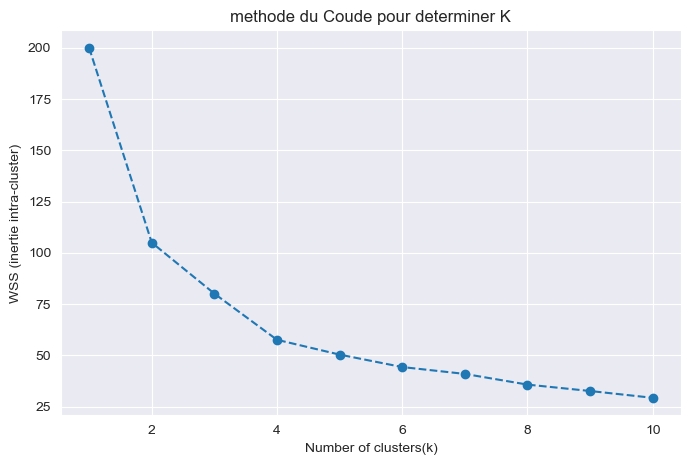

In [32]:
# trouver le nombre optima de clusters(k) avec la méthode du coude

wss =[]
K_range =range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k ,random_state=42)
    kmeans.fit(df_scaled)
    wss.append(kmeans.inertia_)
    
#Tracer la courbe du coude
plt.figure(figsize=(8,5))
plt.plot(K_range,wss ,marker='o',linestyle='--')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WSS (inertie intra-cluster)')
plt.title("methode du Coude pour determiner K")
plt.show()



Application des K-means avec K optimal

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'clusters K-Means')

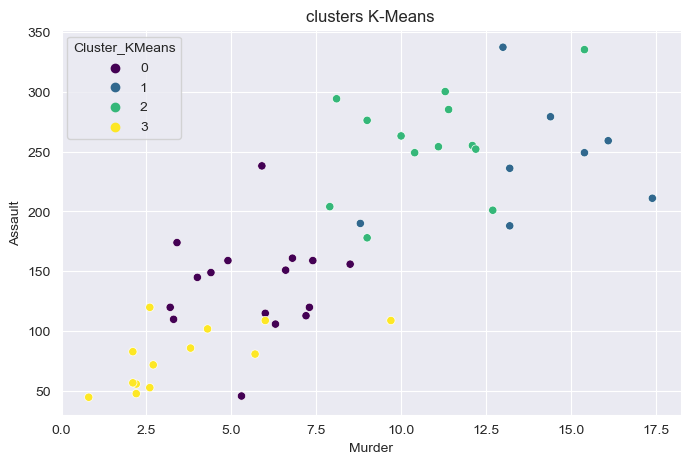

In [33]:
#pour analyse du graphique , supposons que k=4 est optimal
kmeans= KMeans(n_clusters=4, random_state=42)
df["Cluster_KMeans"]=kmeans.fit_predict(df_scaled)

#affichage des clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Murder"],y=df["Assault"],hue=df["Cluster_KMeans"] ,palette="viridis")
plt.title("clusters K-Means")

Clustering avec DBSCAN

Text(0.5, 1.0, 'clusters DBSCAN')

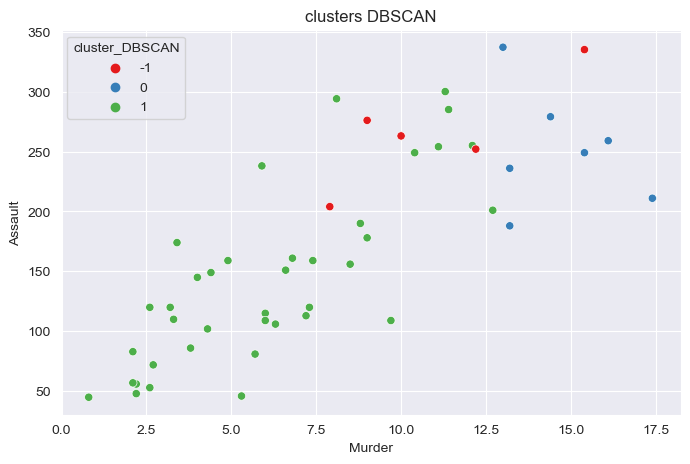

In [35]:
#application des DBSCAN
dbscan =DBSCAN(eps=1.2,min_samples=2,metric='euclidean',n_jobs=-1)
df["cluster_DBSCAN"] =dbscan.fit_predict(df_scaled)

#visualisation des clusters DBSCAN
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Murder"],y=df["Assault"],hue=df["cluster_DBSCAN"] ,palette="Set1")
plt.title("clusters DBSCAN")

clustering hierarchique

In [ ]:
#Application du clutering hiérachique avec 4 clusters

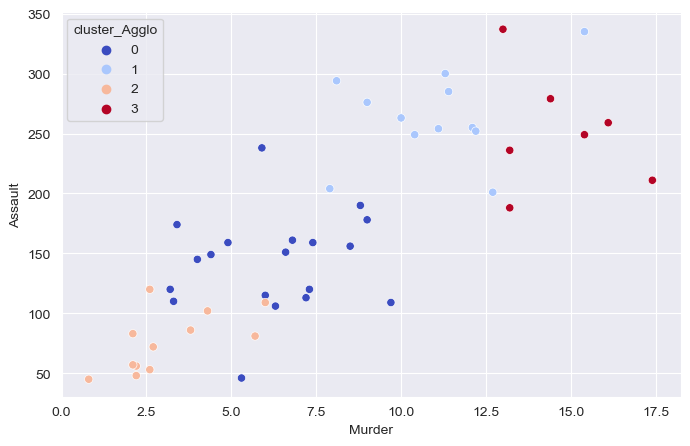

In [36]:
agglo =AgglomerativeClustering(n_clusters=4)
df["cluster_Agglo"] =agglo.fit_predict(df_scaled)

#visualisation
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Murder"],y=df["Assault"],hue=df["cluster_Agglo"] ,palette="coolwarm")
plt.show()

evaluation des cluster

In [43]:
#calcul du score de silhouette pour K-Means et Agglomeration Clustering
silhouette_kmeans =silhouette_score(df_scaled, df["Cluster_KMeans"])
silhouette_agglo=silhouette_score(df_scaled, df["cluster_Agglo"])

print(f"Silhouette Score pour K-Means: {silhouette_kmeans:.2f}")
print(f"Silhouette Score pour Clustering Hiérarchique: {silhouette_agglo:.2f}")

Silhouette Score pour K-Means: 0.34
Silhouette Score pour Clustering Hiérarchique: 0.34
